# Notebook 10: Testing Explanations II

You've made it to the last notebook: **CONGRATULATIONS!!!**

In this notebook, you are free to explore any data you'd like in order to make your final explanations for COVID-19 positivity *as convincing as possible*. This notebook is designed for you to use it however you'd like; the sections of this notebook are as follows:
1. Loading data and required libraries
2. Scatter plots and best-fit lines
3. Contingency tables
4. Histograms
5. $Chi^2$ analysis.


<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/covid_ds.jpeg" alt="Drawing" width="600"> </td>
</tr></table>

<br>

#### But before you begin, please fill in the following cell!

In [1]:
your_name_here = "???"
print(f"Hello, my name is {your_name_here}, and I am a data scientist!")

Hello, my name is ???, and I am a data scientist!


------------------------------------------
## 1. Loading data and required libraries.

Reference notebook(s): Notebook_1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Next we load our data into a usable format
frame = pd.read_csv("https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/Datasets/cov_chi_with_positivity.csv?raw=true")

# Drop the missing values
frame = frame.dropna()

_____________________________________________________________________

## The Data Dictionary
_____________________________________________________________________

`ZIP`: ZIP code

**Population**

`POP`: Total population

`P0_44`: Number of people ages 0 to 44

`P45_64`: Number of people ages 45 to 64:

`P65_`: Number of people ages 65 and older

<p>&nbsp;</p>

**Socio-economic status**

`MEDINC`: Median household income

`PERNOINS`: Percent without health insurance

<p>&nbsp;</p>

**Racial/Ethnic neighbourhood types**

`PERBLK`: Percent of population that is Black  

`PERHISP`: Percent of population that is Hispanic  

`PERW`: Percent of population that is White

`PERASN`: Percent of population that is Asian

<p>&nbsp;</p>

**Occupations**

`PEROFFTC`: Percent office and telecommute workers

`PERHSRV`: Percent healthcare service workers

`PERPSRV`: Percent public service workers

`PERFOOD`: Percent food service workers

`PERCLEAN`: Percent cleaning service workers

<p>&nbsp;</p>

**How people get to work**

`PERAUTO`: Percent personal automobile commuters

`PERTRAN`: Percent public transportation commuters

`PERPEDB`: Percent pedestrian and bike commuters

`PERTELE`: Percent telecommuters (work from home)


<p>&nbsp;</p>

**Built environments**

`FDTRTPER`: Percent food desert tracts

`WS_5`: Hospital accessibility score (lower score = hospitals are farther away)

`POPDENS`: Population density (per square meter)  

`PERCROWD`: Percent housing units w/ > 1 person per room



<p>&nbsp;</p>

**COVID-19**

`CASE4_16`: Cases, total (4/16):

`TEST4_16`: Tests, total (4/16)

`CASER4_16`: Case Rate (4/16) (per pop.)

`TESTR4_16`: Testing Rate (4/16) (per pop.)

`POSRATE4_16`: Positivity rate (4/16) (percent)


In [4]:
# Use this cell to explore the different variables by changing the name inside. 
# Remove '.head()' to see all of the data!
frame['MEDINC'].head()

0    103243
1    111164
2    131477
3     93508
4     44043
Name: MEDINC, dtype: int64

---------------------------------
## 2. Scatter plots and best-fit lines.

*Tip: You can also change the y-axis variable to be anything you'd like! It doesn't have to be `POSRATE4_16`*

Reference notebook(s): Notebook_3, Notebook_8

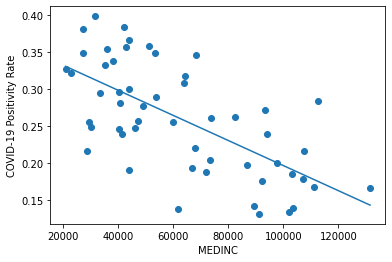

R-squared: 0.43286406687053297
Correlation p-value: 8.643899684124469e-08


In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Visualizing to assist 
# Generate scatterplots of variables vs. mortality

exp_var_to_explore = 'MEDINC'

x = frame[exp_var_to_explore]
y = frame['POSRATE4_16']

# Put the dots on the plot
plt.scatter(x, y)

# Here we add a 'line of best fit' that helps us visualize potential correlation!
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))


plt.xlabel(exp_var_to_explore)
plt.ylabel('COVID-19 Positivity Rate')

# Reveal the plot. 
plt.show()

# Now find correlation and p-value. 
r_val, p_val = pearsonr(x,y)
r_squared = r_val**2
print(f"R-squared: {r_squared}")
print(f"Correlation p-value: {p_val}")

## 3. Contingency Tables

Reference notebook(s): Notebook_4, Notebook_9

|             | below_med_explan | above_med_explan     |
| :---        |    :----:   |          ---: |
| below_med_outcome      | A       | B   |
| above_med_outcome      | C        | D      |

Remember that contingency tables show "groups within groups". This means we need to convert our quantitative data which has a range of values (e.g. 0-100) to categorical data (e.g. below 50 and above 50). Deciding what our "cut off" is to create the two groups is up to us, but a common practice is to use the **median** (middle) value.

In [6]:
# This is the function that allows us to visualize our contingency table.

def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<20s} {:<20s} {:<10s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<20s} {:<20s} {:<10s}'.format(left_labels[i], str(line[0]), str(line[1])))
        i += 1
    print("\n")

In [7]:
# Enter the outcome and explanatory variables of your choosing. 
# Enter the names (as a string, in quotes) of a variable. 

explan_var = 'MEDINC'
outcome_var = 'POSRATE4_16'

print(f"Your explanatory variable: {explan_var}")
print(f"Your outcome variable: {outcome_var}")


Your explanatory variable: MEDINC
Your outcome variable: POSRATE4_16


In [8]:
# First we can create separate dataframes for 'below' and 'above' the median explanatory variable

median_explan = frame[explan_var].median() # Determine the median value
above_med_explan = frame[frame[explan_var] > median_explan] # Data frame containing all regions with above median explanatory variable value
below_med_explan = frame[frame[explan_var] <= median_explan]  # The rest of the data frames (below median value)

# Now we want to count the number of locations with above-and-below median positivity rates (within each)
# For simplicity, we label our values according to the table above.

med_positivity = frame[outcome_var].median()  # Calculate median positivity (across all of Chicago) here!

# For example "A" should be the count of all ZIP codes with explanatory variables
# below the median value that ALSO have below the median positivity!

A_val = below_med_explan[below_med_explan[outcome_var] < med_positivity].shape[0]
B_val = above_med_explan[above_med_explan[outcome_var] < med_positivity].shape[0]
C_val = below_med_explan[below_med_explan[outcome_var] > med_positivity].shape[0]
D_val = above_med_explan[above_med_explan[outcome_var] > med_positivity].shape[0]

# Place the variables for each of the counts in the contingency table and run the function to create it.

left_labels = [f'below_med_{outcome_var}', f'above_med_{outcome_var}']
top_labels = [" ", f'below_med_{explan_var}', f'above_med_{explan_var}']

contingency_table = [
    [A_val, B_val],
    [C_val, D_val]
]

visualize_contingency_table(contingency_table, top_labels, left_labels)

                     below_med_MEDINC     above_med_MEDINC
below_med_POSRATE4_16 7                    19        
above_med_POSRATE4_16 19                   7         




----------------------
## 4. Histograms
Reference notebook(s): Notebook_4

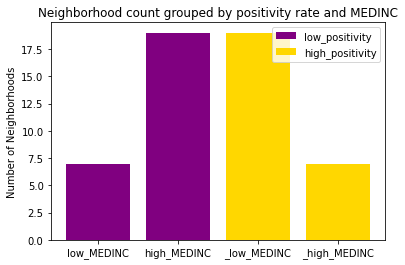

In [10]:
# Let's first translate our contingency variables from the previous section into something more 'readable'

low_pos_low_explan = A_val  # low positivity, low explanatory variable
low_pos_high_explan = B_val   # low positivity, high explanatory variable
high_pos_low_explan = C_val  # high positivity, low explanatory variable
high_pos_high_explan = D_val   # high positivity, high explanatory variable


plt.bar(x=[f'low_{explan_var}', f'high_{explan_var}'],
        height=[low_pos_low_explan, low_pos_high_explan], color='purple', label='low_positivity')

plt.bar(x=[f'_low_{explan_var}', f'_high_{explan_var}'],
        height=[high_pos_low_explan, high_pos_high_explan], color='gold', label='high_positivity')

plt.ylabel("Number of Neighborhoods")

plt.title(f"Neighborhood count grouped by positivity rate and {explan_var}")
plt.legend()
plt.show()

---------------------------
## 5. $Chi^2$ Analysis

Reference notebook(s): Notebook_4, Notebook_9

In [11]:
from scipy.stats import chi2_contingency
# Now let us get our p-value!
# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need.
chi_square, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square value: {chi_square}")
print(f"p-value: {p_value}")

Chi-Square value: 9.307692307692308
p-value: 0.002281937253315446


In [ ]:
# Create as many cells as you want here (or anywhere)!

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size="4">**Journal 10:** Reflect </font>

**Based on your analysis, what is your central explanation for why Covid-19 impacted some communities in Chicago more than others? Try to package this into a clear and concise claim.**

> Write your answer here!